In [20]:
!pip install torchsummary

In [3]:
import os
train_dir = "output" + "/train"
valid_dir = "output" + "/val"
diseases = os.listdir(train_dir)

# We will find the length of the total plants incliuding healthy and diseased
print(len(diseases))

39


In [2]:
import os                       # operating system for using the inbuilt file system
import numpy as np              # matrices and vectors
import pandas as pd             # working with dataframes
import torch                    # Pytorch 
import matplotlib.pyplot as plt # for plotting informations 

In [172]:
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tom

#### Look-up Table - for determining the class to which the plant belongs to

In [10]:
pd.DataFrame(diseases, columns = ["Disease"])

Disease
0                              Apple___Apple_scab
1                               Apple___Black_rot
2                        Apple___Cedar_apple_rust
3                                 Apple___healthy
4                       Background_without_leaves
5                             Blueberry___healthy
6                                Cherry___healthy
7                         Cherry___Powdery_mildew
8      Corn___Cercospora_leaf_spot Gray_leaf_spot
9                              Corn___Common_rust
10                                 Corn___healthy
11                    Corn___Northern_Leaf_Blight
12                              Grape___Black_rot
13                   Grape___Esca_(Black_Measles)
14                                Grape___healthy
15     Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
16       Orange___Haunglongbing_(Citrus_greening)
17                         Peach___Bacterial_spot
18                                Peach___healthy
19                  Pepper,_bell___Bacterial_spot
20                         Pepper,_bell___healthy
21                          Potato___Early_blight
22                               Potato___healthy
23                           Potato___Late_blight
24                            Raspberry___healthy
25                              Soybean___healthy
26                        Squash___Powdery_mildew
27                           Strawberry___healthy
28                       Strawberry___Leaf_scorch
29                        Tomato___Bacterial_spot
30                          Tomato___Early_blight
31                               Tomato___healthy
32                           Tomato___Late_blight
33                             Tomato___Leaf_Mold
34                    Tomato___Septoria_leaf_spot
35  Tomato___Spider_mites Two-spotted_spider_mite
36                           Tomato___Target_Spot
37                   Tomato___Tomato_mosaic_virus
38         Tomato___Tomato_Yellow_Leaf_Curl_Virus

#### Now we do display the images for each category .... There are 39 categories in total

Total :  49179


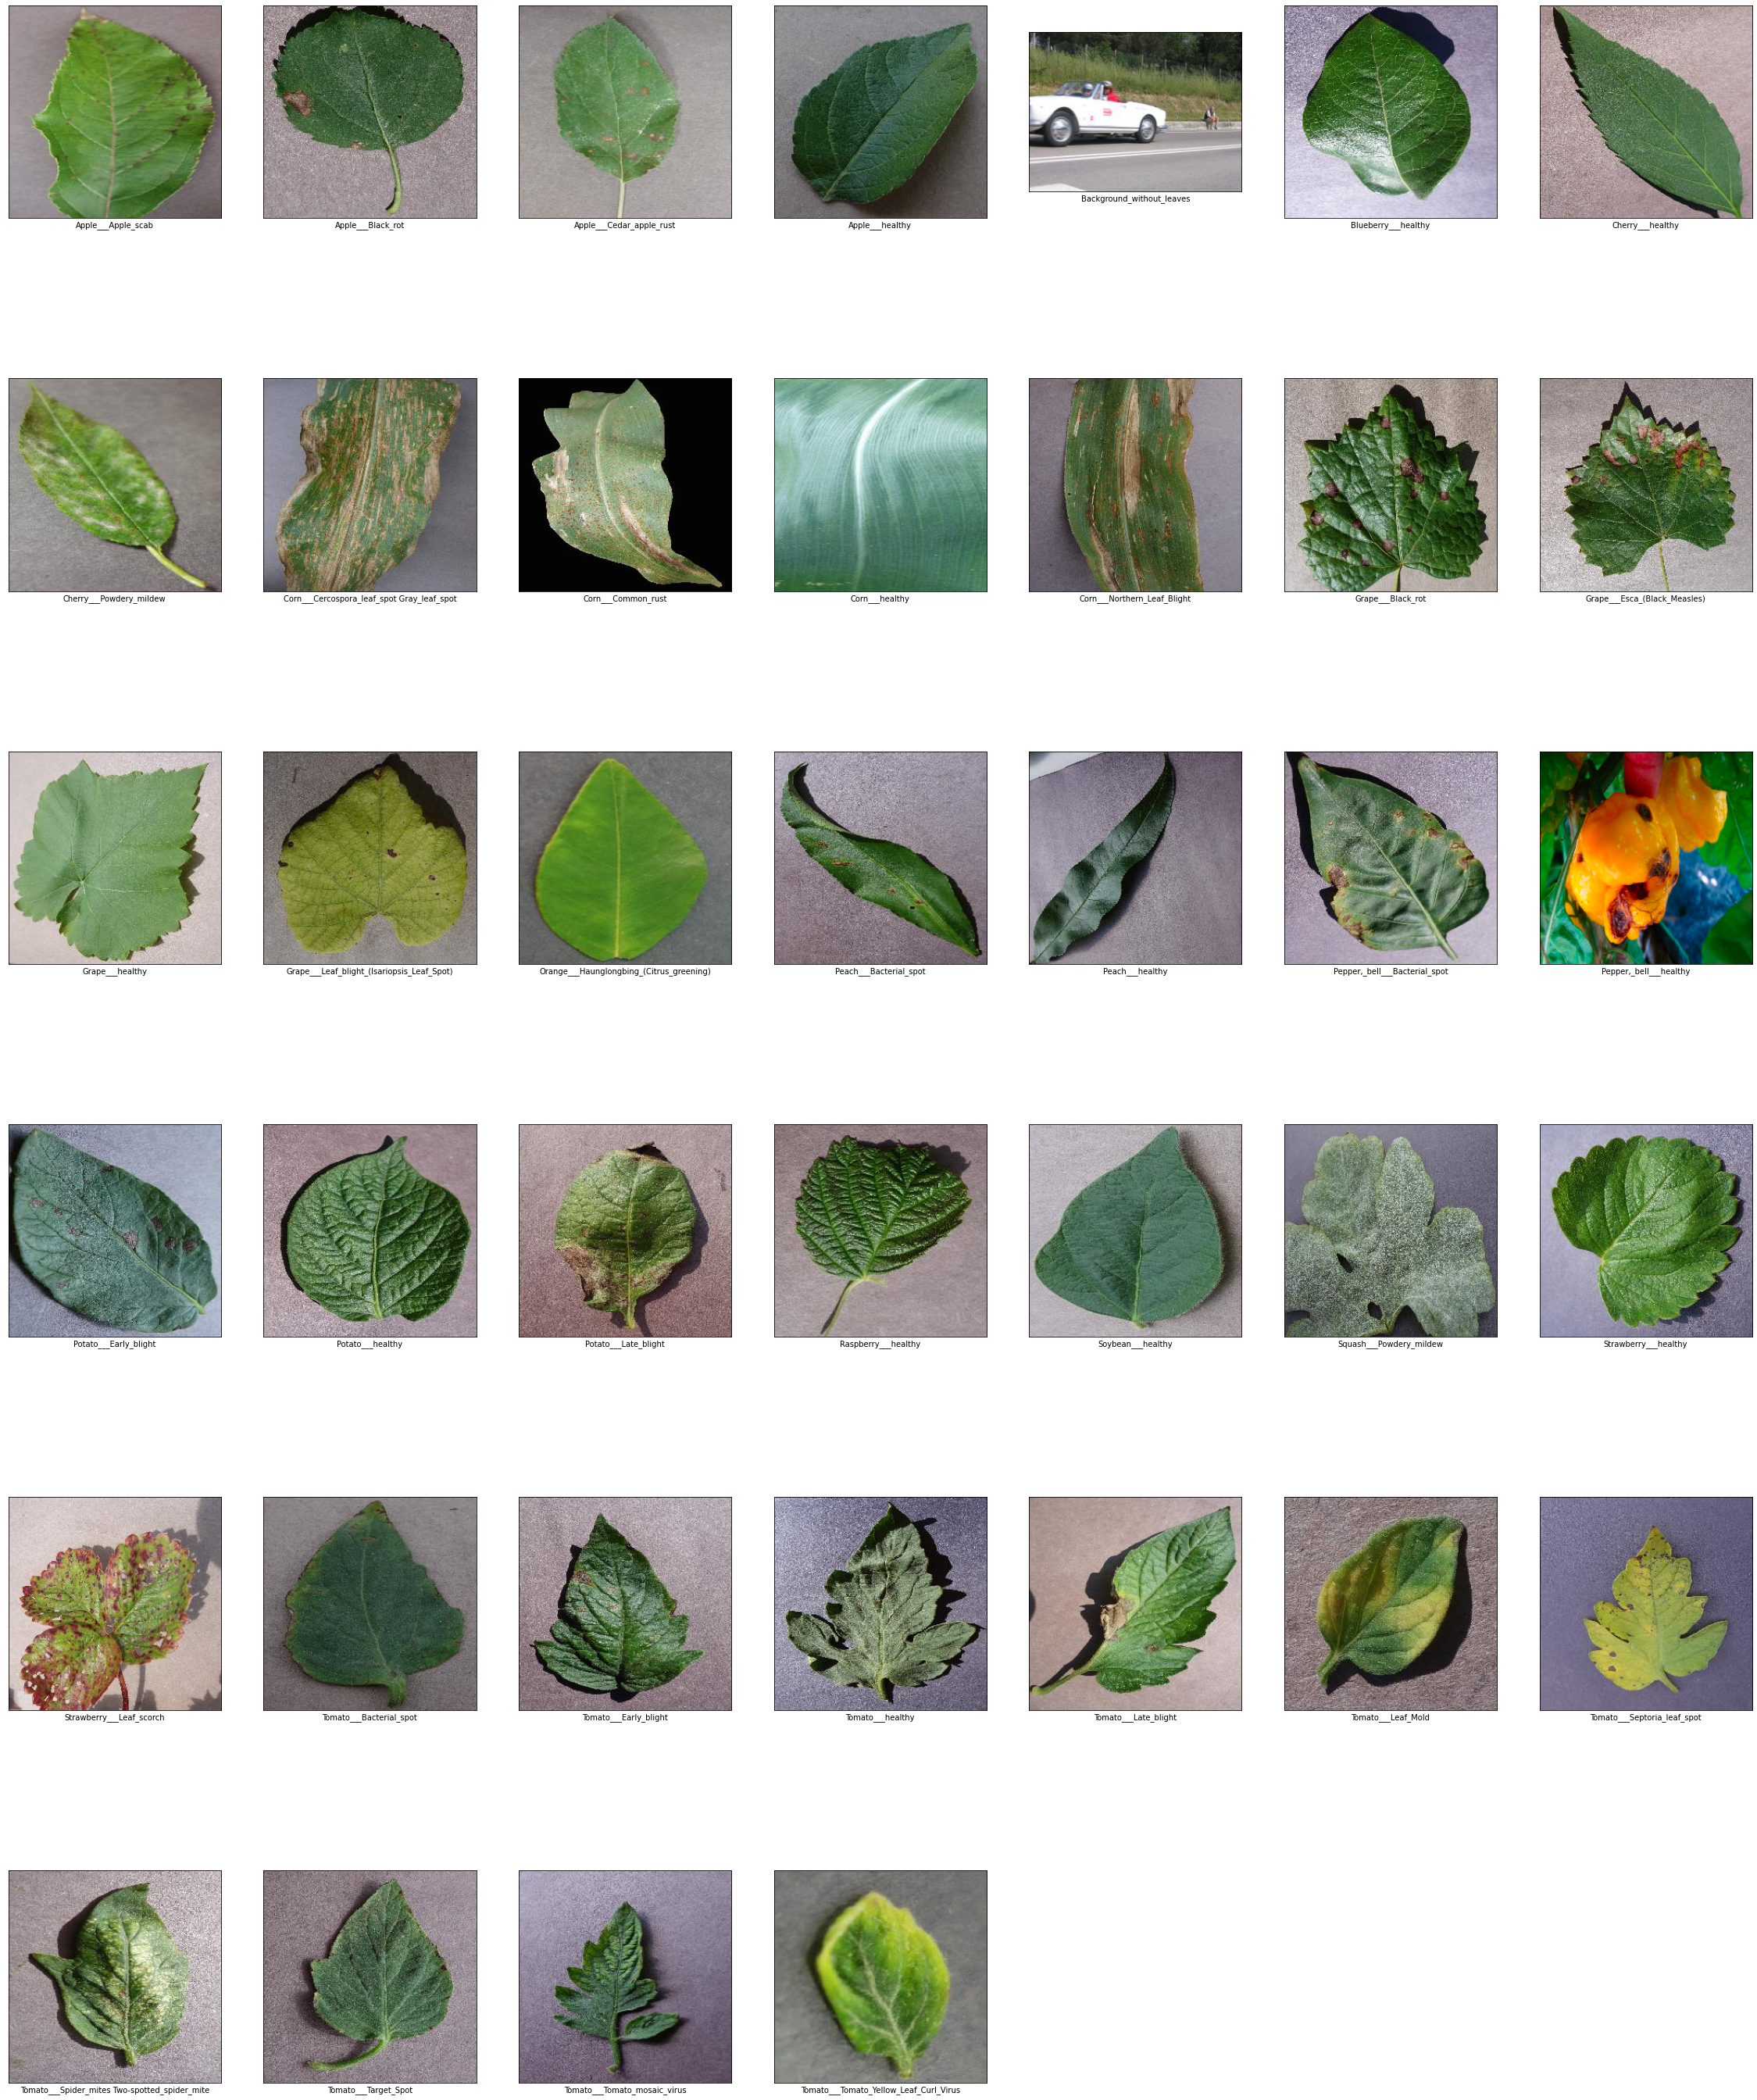

In [4]:
plt.figure(figsize=(40,60))
count=0
plant_names=[]
total_images=0

for i in os.listdir("output/train"):
  count+=1
  plant_names.append(i)
  plt.subplot(7,7,count)

  images_path=os.listdir("output/train"+"/"+i)

  total_images+=len(images_path)


  image_show=plt.imread("output/train"+"/"+i+"/"+images_path[0])
  
  plt.imshow(image_show)
  plt.xlabel(i)
  plt.xticks([])
  plt.yticks([])

print("Total : ",total_images)

In [25]:
plant_names = []
total_dis = 0
for i in diseases:

    if i.split('___')[0] not in plant_names:
        
        plant_names.append(i.split('___')[0])
        
    elif i.split('___')[1] != 'healthy':
        total_dis += 1
print(total_dis)
print(39-total_dis)

17
22


In [26]:
print(f"Plant names  are: \n{plant_names}")

Plant names  are: 
['Apple', 'Background_without_leaves', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [27]:
print("Number of plants: {}".format(len(plant_names)))


Number of plants: 15


### Total Plants are 15 in number
### Total Categories are 39 in number
### Total Diseases are 17 in number
### Total Healthy are 22 in number

In [7]:
# Number of images for each disease
total = {}
for i in diseases:
    total[i] = len(os.listdir(train_dir + '/' + i))

df1 = pd.DataFrame(total, index=['Total'])
df1.T

Total
Apple___Apple_scab                               800
Apple___Black_rot                                800
Apple___Cedar_apple_rust                         800
Apple___healthy                                 1316
Background_without_leaves                        914
Blueberry___healthy                             1201
Cherry___healthy                                 800
Cherry___Powdery_mildew                          841
Corn___Cercospora_leaf_spot Gray_leaf_spot       800
Corn___Common_rust                               953
Corn___healthy                                   929
Corn___Northern_Leaf_Blight                      800
Grape___Black_rot                                944
Grape___Esca_(Black_Measles)                    1106
Grape___healthy                                  800
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       860
Orange___Haunglongbing_(Citrus_greening)        4405
Peach___Bacterial_spot                          1837
Peach___healthy                                  800
Pepper,_bell___Bacterial_spot                    800
Pepper,_bell___healthy                          1182
Potato___Early_blight                            800
Potato___healthy                                 800
Potato___Late_blight                             800
Raspberry___healthy                              800
Soybean___healthy                               4072
Squash___Powdery_mildew                         1468
Strawberry___healthy                             800
Strawberry___Leaf_scorch                         887
Tomato___Bacterial_spot                         1701
Tomato___Early_blight                            800
Tomato___healthy                                1272
Tomato___Late_blight                            1527
Tomato___Leaf_Mold                               800
Tomato___Septoria_leaf_spot                     1416
Tomato___Spider_mites Two-spotted_spider_mite   1340
Tomato___Target_Spot                            1123
Tomato___Tomato_mosaic_virus                     800
Tomato___Tomato_Yellow_Leaf_Curl_Virus          4285

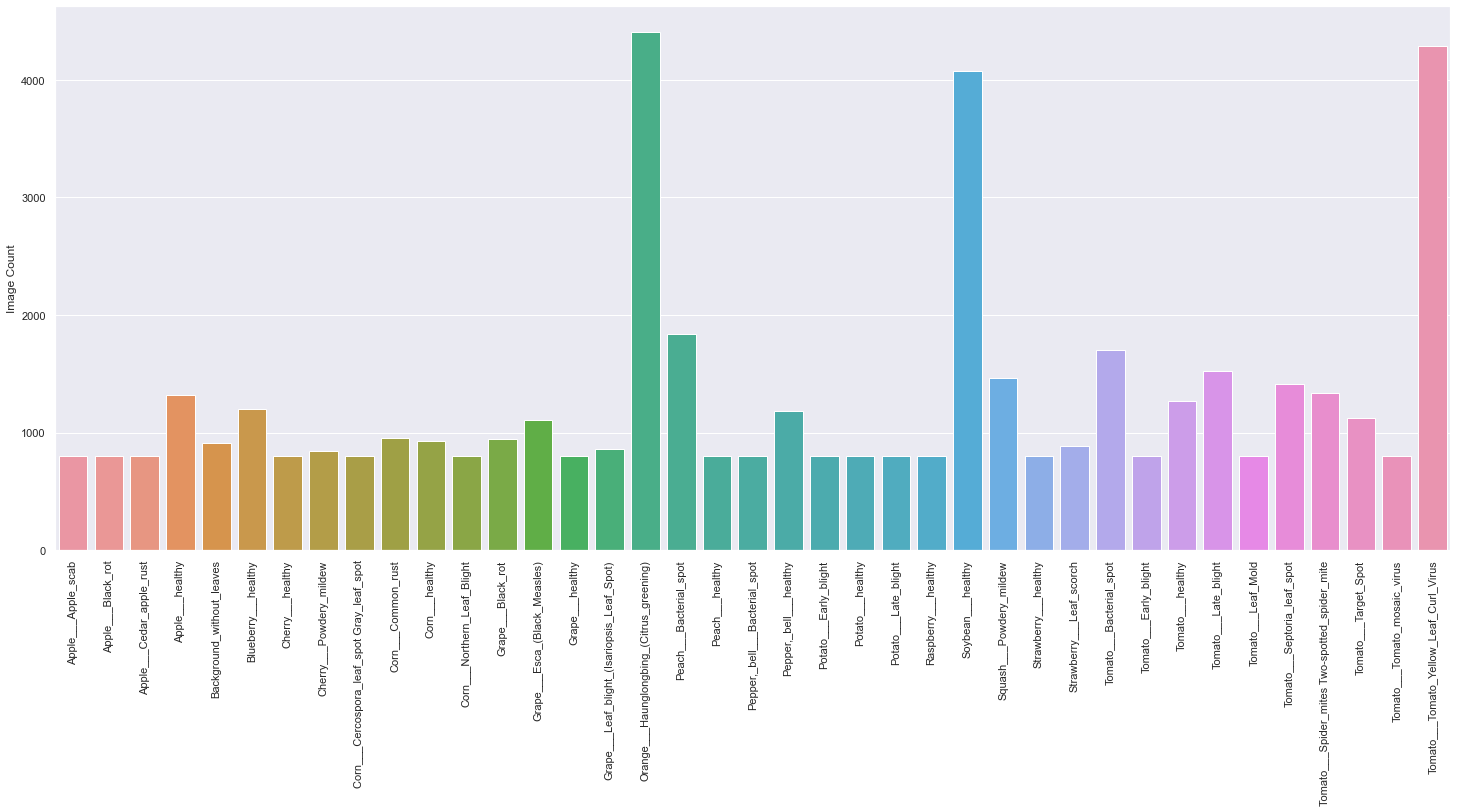

In [29]:
import seaborn as sns
sns.set(style="whitegrid")
total_count_in_a_class = pd.DataFrame(total.values(), index=total.keys(), columns=["Image Count"])
total_count_in_a_class

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x = total_count_in_a_class.index, y = "Image Count", data = total_count_in_a_class)
plt.xticks(rotation=90)


plt.show() 


In [30]:
n_train = 0
for value in total.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 49179 images for training


In [31]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [33]:
base_model_tf = \
ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=39)

In [45]:
#Model building
base_model_tf.trainable=False

pt=Input(shape=(224,224,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)

# average pooling global
model_resnet=GlobalAveragePooling2D()(model_resnet)

# relu activation function
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
# model_resnet=Dense(64,activation='relu')(model_resnet)
# model_resnet=Dense(64,activation='relu')(model_resnet)

model_resnet=Dense(39,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_3 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_3   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0   

In [46]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()


train= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=valid_dir,batch_size=32,target_size=(224,224),\
                                      color_mode='rgb',class_mode='categorical')

Found 49179 images belonging to 39 classes.
Found 6139 images belonging to 39 classes.


In [47]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [48]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
#Training
model_main.fit(train,validation_data=valid,\
              epochs=10, 
              steps_per_epoch=80, \
              validation_steps=80, \
              verbose=1)
# if you dont add validation steps it switches to infinite mode and our application hangs 

Epoch 1/10
80/80 [==============================] - 234s 3s/step - loss: 0.3902 - accuracy: 0.8845 - val_loss: 0.3049 - val_accuracy: 0.9069
Epoch 2/10
80/80 [==============================] - 233s 3s/step - loss: 0.3568 - accuracy: 0.8898 - val_loss: 0.3556 - val_accuracy: 0.8806
Epoch 3/10
80/80 [==============================] - 234s 3s/step - loss: 0.2796 - accuracy: 0.9180 - val_loss: 0.2944 - val_accuracy: 0.9044
Epoch 4/10
80/80 [==============================] - 230s 3s/step - loss: 0.2952 - accuracy: 0.9082 - val_loss: 0.2649 - val_accuracy: 0.9075
Epoch 5/10
80/80 [==============================] - 232s 3s/step - loss: 0.2551 - accuracy: 0.9219 - val_loss: 0.2439 - val_accuracy: 0.9225
Epoch 6/10
80/80 [==============================] - 230s 3s/step - loss: 0.2372 - accuracy: 0.9207 - val_loss: 0.3071 - val_accuracy: 0.9025
Epoch 7/10
80/80 [==============================] - 241s 3s/step - loss: 0.1920 - accuracy: 0.9355 - val_loss: 0.3144 - val_accuracy: 0.9050
Epoch 8/10
80

In [76]:
model_main.save("RESNET50_PLANT_DISEASE.h5")

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Text(0.5, 1.0, 'EPOCH VS LOSS')

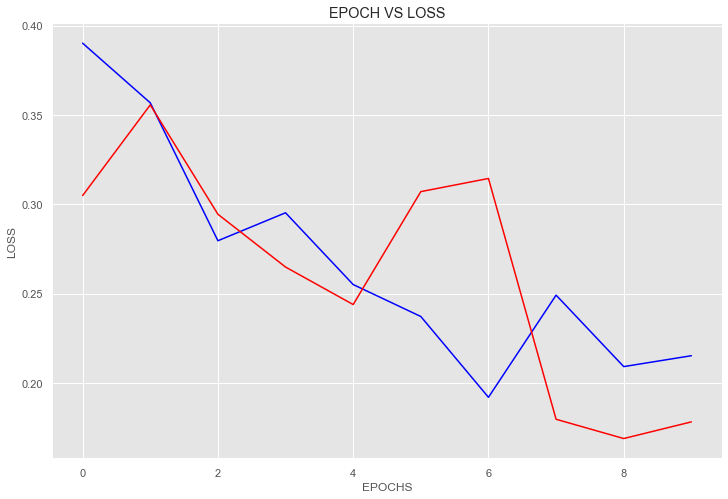

In [77]:
plt.figure(figsize=(12,8))
from matplotlib import style
style.use("ggplot")
plt.plot(model_main.history.history['loss'], color='blue',label='Training loss')
plt.plot(model_main.history.history['val_loss'],color='red',label='Validation loss')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.title("EPOCH VS LOSS")

Text(0.5, 1.0, 'EPOCHS VS ACCURACY')

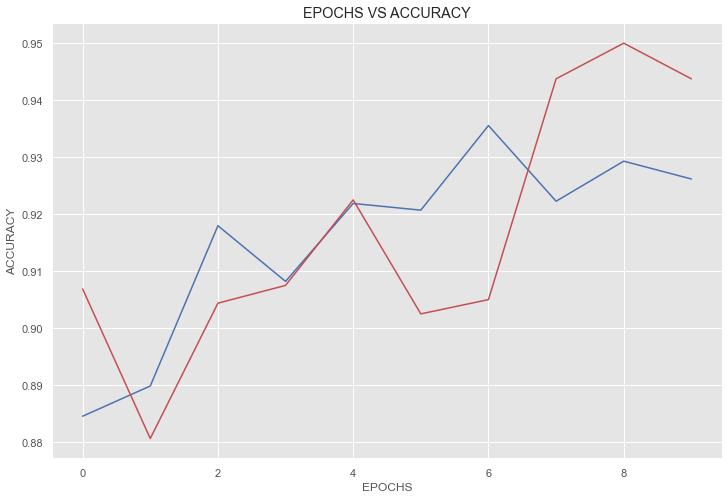

In [78]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(12,8))

plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS VS ACCURACY")

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS VS ACCURACY")

### Predictions and Testing of our applications

In [149]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 224, 224

In [189]:
# predicting images
img = image.load_img('output//test//Apple___Cedar_apple_rust//image (16).jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predict_x=model_main.predict(x) 
classes_x=np.argmax(predict_x,axis=1)
predict_x

print(diseases[classes_x[0]])


Apple___Cedar_apple_rust


In [8]:
# def show_image(image, label):
#     print("Label :" + train.classes[label] + "(" + str(label) + ")")
#     plt.imshow(image.permute(1, 2, 0))

In [ ]:

# images = np.vstack([x])
# classes = model_main.np.argmax(images,axis=1)
# print(classes)


In [ ]:
# # predicting multiple images at once
# img = image.load_img('output/test/image (32).jpg', target_size=(img_width, img_height))
# y = image.img_to_array(img)
# y = np.expand_dims(y, axis=0)
